## Bank Churn Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
df = pd.read_csv(r"C:\Users\SPK\Desktop\python\Bank_churn_modelling.csv",sep=";")
df.shape

(10000, 14)

## Data Exploration

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# unwanted column - rownumber, customerid, surname

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## Data Cleaning

In [10]:
# check for duplicates
df.duplicated().sum()

0

In [11]:
# check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# drop the unwanted columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [13]:
# check for outliers
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## Feature Engineering

## Feature Engineering
- EDA - Exploratory Data Analytics / Root Cause Analytics - Data Visualization

    - Univariate Analysis
    - Bivariate ANalysis
    - Multivariate Analysis

- Statistics based feature selection

    - Correlation Analysis
    - ANOVA
    - Chi Square test


EDA - Exploratory Data Analytics / Root Cause Analytics - Data Visualization
Univariate Analysis
- Analysing one variable at a time
- Categorical - Discrete Freuqnecy Distribution - Countplot
- Numeric - Continuous Frequency Distribution - histogram


In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

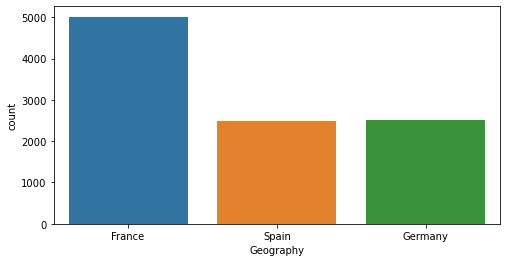

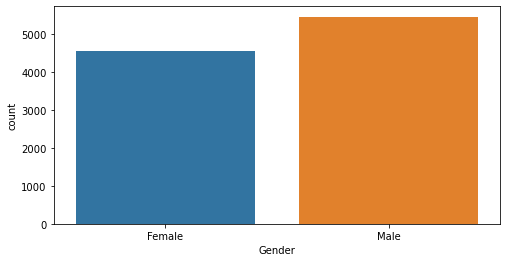

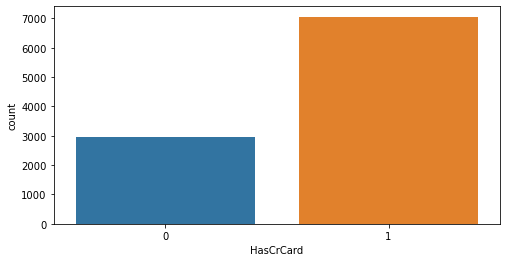

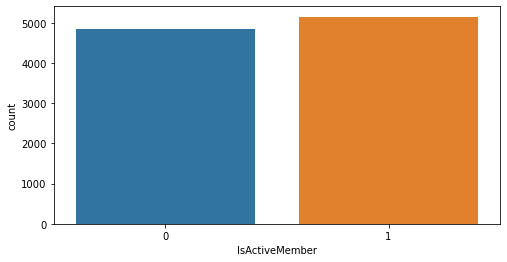

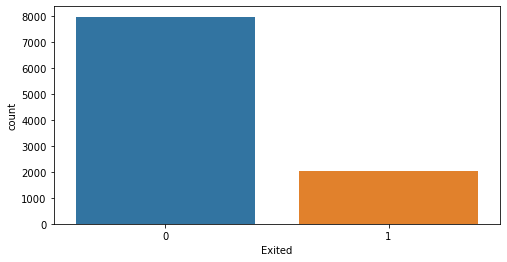

In [15]:
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in cats:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

Note :
- almost 50% of the customers are from france, and rest are from spain and germany
- the ratio of males and females are almost similar
- around 70% of customers have creditcards
- around 50% of customers are not using their ank account actively
- 20% customers left the bank

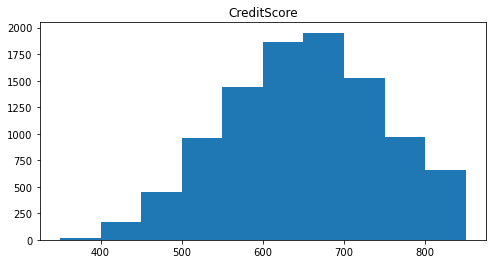

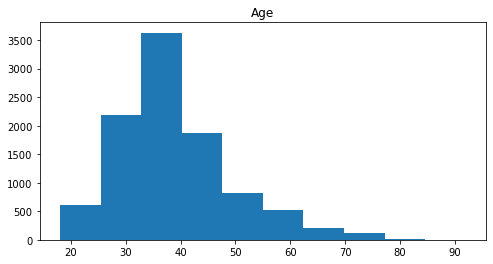

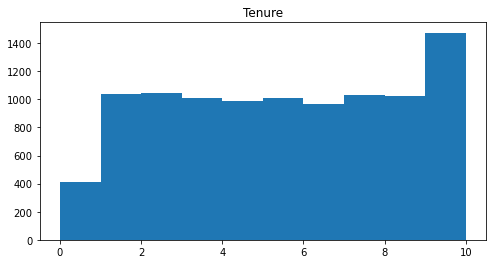

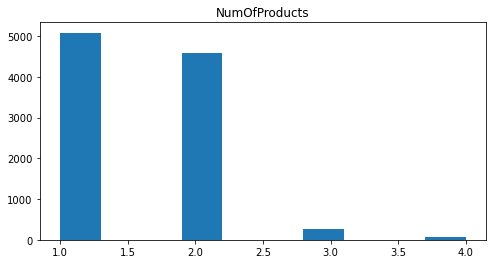

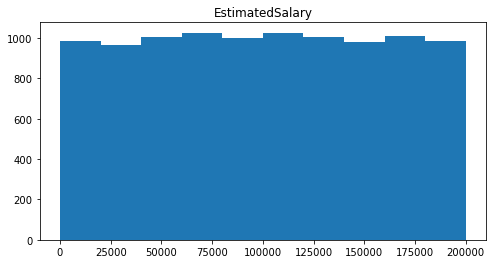

In [16]:
nums = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']

for col in nums:
    plt.figure(figsize=(8,4))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

Note :
- Most of the customers have creditsccore b/w 500 to 800
- most of the customer have age between 25 to 45
- tenure seems to have almost uniform distribution
- there are customers with 0 balance and then other group having balance between 75k to 175k
- most of customers have 1 or 2 products
- salary also has uniform distribution


## Bivariate Analysis

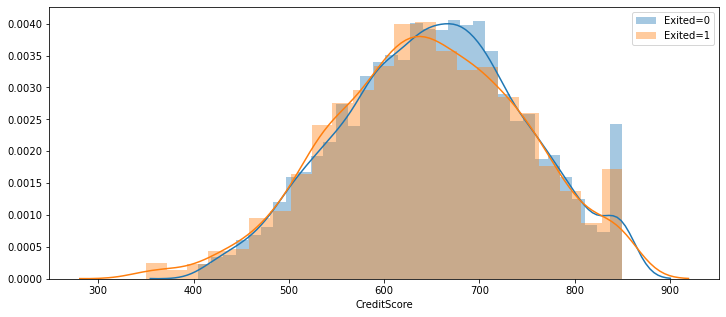

In [17]:
# Numeric v/s categorical - probability density distribution - distplot
# Creditscore v/s exited
plt.figure(figsize=(12,5))
sns.distplot(df['CreditScore'][df.Exited==0])
sns.distplot(df['CreditScore'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

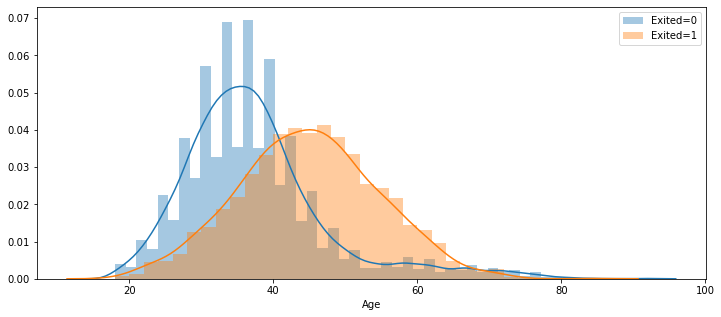

In [18]:
# Numeric v/s categorical - probabilty density distribution - distplot
# Age v/s exited

plt.figure(figsize=(12,5))
sns.distplot(df['Age'][df.Exited==0])
sns.distplot(df['Age'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

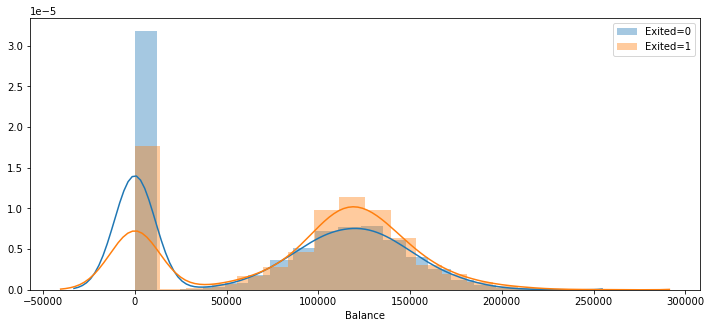

In [19]:
# Balance v/s Exited
plt.figure(figsize=(12,5))
sns.distplot(df['Balance'][df.Exited==0])
sns.distplot(df['Balance'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

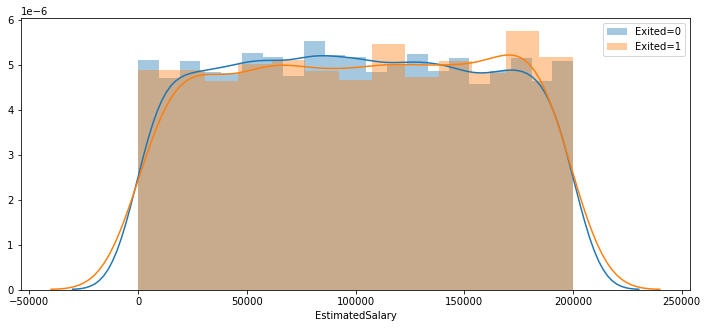

In [20]:
# EstimatedSalary vs exited
plt.figure(figsize=(12,5))
sns.distplot(df['EstimatedSalary'][df.Exited==0])
sns.distplot(df['EstimatedSalary'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

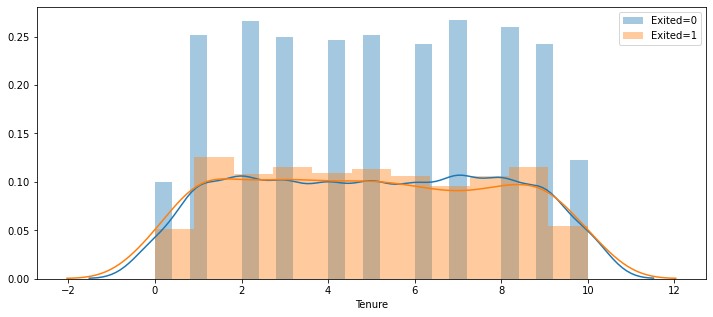

In [21]:
# Tenure v/s exited
plt.figure(figsize=(12,5))
sns.distplot(df['Tenure'][df.Exited==0])
sns.distplot(df['Tenure'][df.Exited==1])
plt.legend(['Exited=0','Exited=1'])
plt.show()

In [22]:
# Categorical vs categorical - pivot - distribution
# Geography v/s Exited
output = pd.crosstab(df.Geography,df.Exited,margins=True)
ratio = output[1]/output['All']
ratio

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64

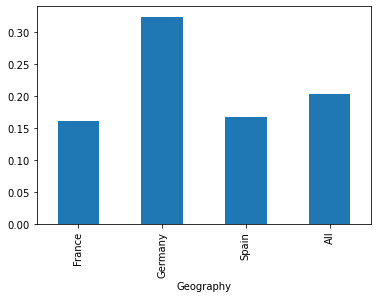

In [23]:
ratio.plot(kind='bar')
plt.show()

In [24]:
# Gender v/s  exited
output = pd.crosstab(df.Gender,df.Exited,margins=True)
ratio = output[1]/output['All']
ratio

Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64

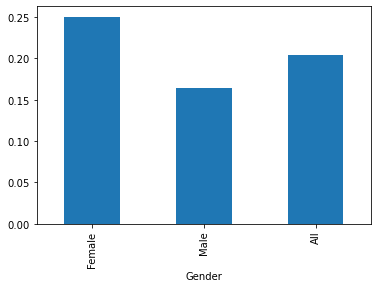

In [25]:
ratio.plot(kind='bar')
plt.show()

In [26]:
# HasCrCard v/s Exited
output = pd.crosstab(df.HasCrCard,df.Exited,margins=True)
ratio = output[1]/output['All']
ratio

HasCrCard
0      0.208149
1      0.201843
All    0.203700
dtype: float64

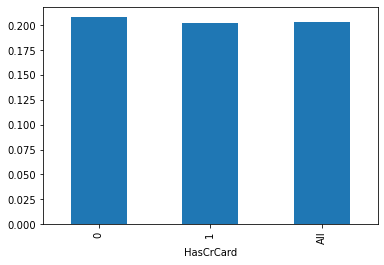

In [27]:
ratio.plot(kind='bar')
plt.show()

In [28]:
# IsActiveMember v/s Exited
output = pd.crosstab(df.IsActiveMember,df.Exited,margins=True)
ratio = output[1]/output['All']
ratio

IsActiveMember
0      0.268509
1      0.142691
All    0.203700
dtype: float64

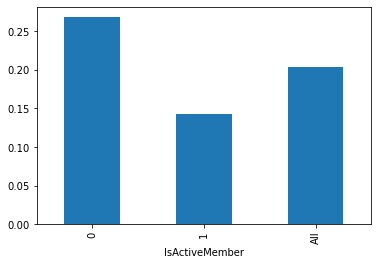

In [29]:
ratio.plot(kind='bar')
plt.show()

## Multivariate analysis

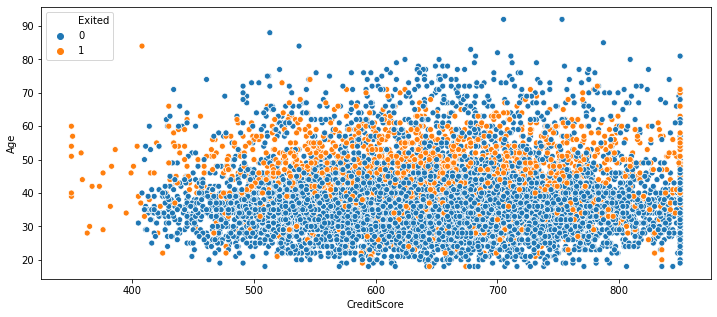

In [30]:
# categorical v/s numeric v/s numeric - scatterplot
# Exited v/s Creditscore v/s Age

plt.figure(figsize=(12,5))
sns.scatterplot(x='CreditScore',y='Age',hue='Exited',data=df)
plt.show()

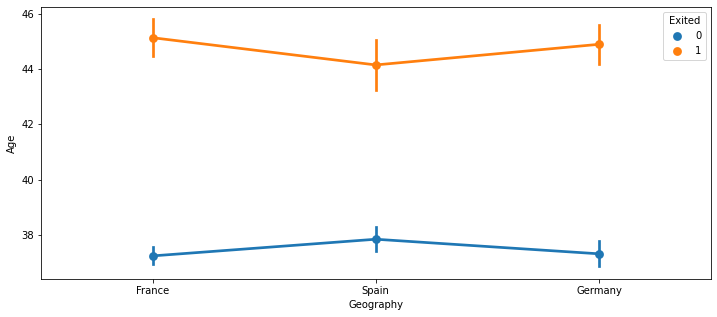

In [31]:
#Categorical v/s numeric v/s categorical - pointplant
#Georaphy v/s Age v/s Exited
#the dot is mean and the straight line is std deviation

plt.figure(figsize=(12,5))
sns.pointplot(x='Geography',y='Age',hue='Exited',data=df)
plt.show()

## Statistical methods

### Correlation Analysis

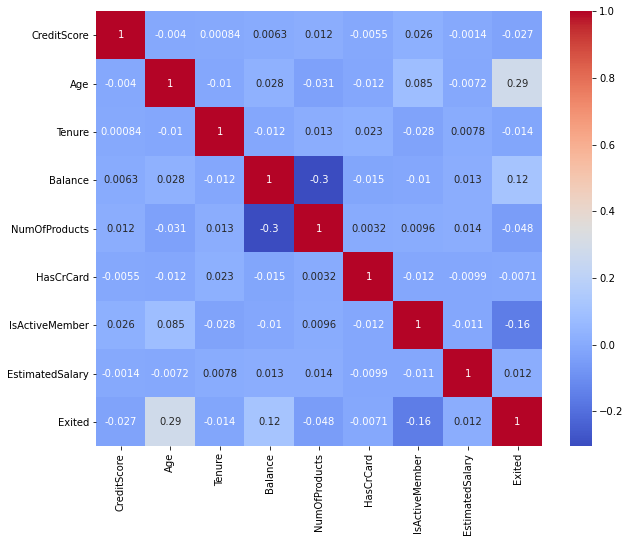

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [33]:
# Important features - Age, Balance, IsActiveMember

#### ANOVA - Analysis of variance
 - used to compare the means of two or more groups
 - in our case we can use this technique for a numeric feaure - 
 - for example - creditscore - we can compare mean of creditscore of customers who left the bank with mean of creditscore of customers who did not leave the bank
 
 - Null Hypothesis = Means of two or more groups are similar
 - Alternate Hypothesis = Means of two or more groups are different
 
     - ANOVA - F test
        - if business confidence = 95% = 0.95, alpha = 1-0.95 = 0.05
        
              - if pvalue > alpha = accept Null Hypothesis = feature is not important
              - if pvalue < alpha = reject Null Hypothesis = feature is important


In [34]:
nums = ['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'EstimatedSalary']
xd = df[nums]
yd = df['Exited']
from sklearn.feature_selection import f_classif
fvalue,pvalue = f_classif(xd,yd)

for i in range(len(nums)):
    print(nums[i], pvalue[i])


CreditScore 0.006738213892258643
Age 1.2399313093415039e-186
Tenure 0.1615268494952801
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.22644042802376574


#### Chi Square test
- used to compare the distribution of a categorical attribute between two or more groups
- for example - it can be used to compare the distribution of male:female for customer who left and customers who did not leave

      - Null Hypothesis = dsitrbution of categories in two or more groups is similar
      - Alternate Hypothesis = distribution of categories in two or more groups is different
      
      if business confidence = 95% i.e. alpha = 1-0.95 = 0.05
      - if pvalue > alpha = accept the NUll HYPOTHESIS - feature is not important
      - of pvalue < alpha = reject the null hypothesis - features is imortant

    
        

In [35]:
cats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
xd = df[cats]
yd = df['Exited']
xd.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0


In [36]:
from sklearn.preprocessing import LabelEncoder
xd['Geography'] = LabelEncoder().fit_transform(xd['Geography'])
xd['Gender'] = LabelEncoder().fit_transform(xd['Gender'])

from sklearn.feature_selection import chi2
chival, pvalue = chi2(xd,yd)

for i in range(len(cats)):
    print(cats[i],pvalue[i])


Geography 0.0005756078382573235
Gender 7.015574513879596e-13
HasCrCard 0.6984962089530451
IsActiveMember 1.5680362405434552e-27
Exited 0.0


<ipython-input-36-1b82edbeb490>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd['Geography'] = LabelEncoder().fit_transform(xd['Geography'])
<ipython-input-36-1b82edbeb490>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd['Gender'] = LabelEncoder().fit_transform(xd['Gender'])


In [37]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [38]:
x = df[['CreditScore', 'Geography', 'Gender', 'Age','Balance',
       'NumOfProducts','IsActiveMember']]
y = df['Exited']

### 5.Preprocessing

In [39]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1


In [40]:
# encoding on geography and gender
# scaling on balance, age, creditscore, numofproducts
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

pipeline = ColumnTransformer([("ohe",OneHotEncoder(drop='first'),[1,2])],remainder='passthrough')

x2 = pipeline.fit_transform(x)
x2.shape




(10000, 8)

In [41]:
pd.DataFrame(x2).head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,619.0,42.0,0.00,1.0,1.0
1,0.0,1.0,0.0,608.0,41.0,83807.86,1.0,1.0
2,0.0,0.0,0.0,502.0,42.0,159660.80,3.0,0.0
3,0.0,0.0,0.0,699.0,39.0,0.00,2.0,0.0
4,0.0,1.0,0.0,850.0,43.0,125510.82,1.0,1.0


In [42]:
#train test split
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x2,y,test_size=0.2,random_state=5)
print(x2.shape)
print(xtr.shape)
print(xts.shape)
print(y.shape)
print(ytr.shape)
print(yts.shape)

(10000, 8)
(8000, 8)
(2000, 8)
(10000,)
(8000,)
(2000,)


## Applying ML
ML trying to predict whether the customer is leaving


In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [44]:
# train the model with the train dataset - xtr, ytr
model.fit(xtr,ytr)

DecisionTreeClassifier()

## Performance Analysis

In [45]:
# trying to make prediction for a single customer
# and the the resulrt of the single customer not leave the bank cause it 0
new_customer = [[650,'France','Male',52,150456,2,0]]
new_customer = pipeline.transform(new_customer)
model.predict(new_customer)

array([1], dtype=int64)

In [46]:
# accuracy - measure of exactness
ypred = model.predict(xts)
from sklearn import metrics
metrics.accuracy_score(yts,ypred)

0.785

In [47]:
# recall
metrics.recall_score(yts,ypred)

0.5111111111111111

In [48]:
#precision
metrics.precision_score(yts,ypred)

0.4715261958997722

In [49]:
metrics.confusion_matrix(yts,ypred)

array([[1363,  232],
       [ 198,  207]], dtype=int64)

## Visualize the tree

In [50]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=8,min_samples_leaf=30,random_state=5)
model.fit(xtr,ytr)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=30, random_state=5)

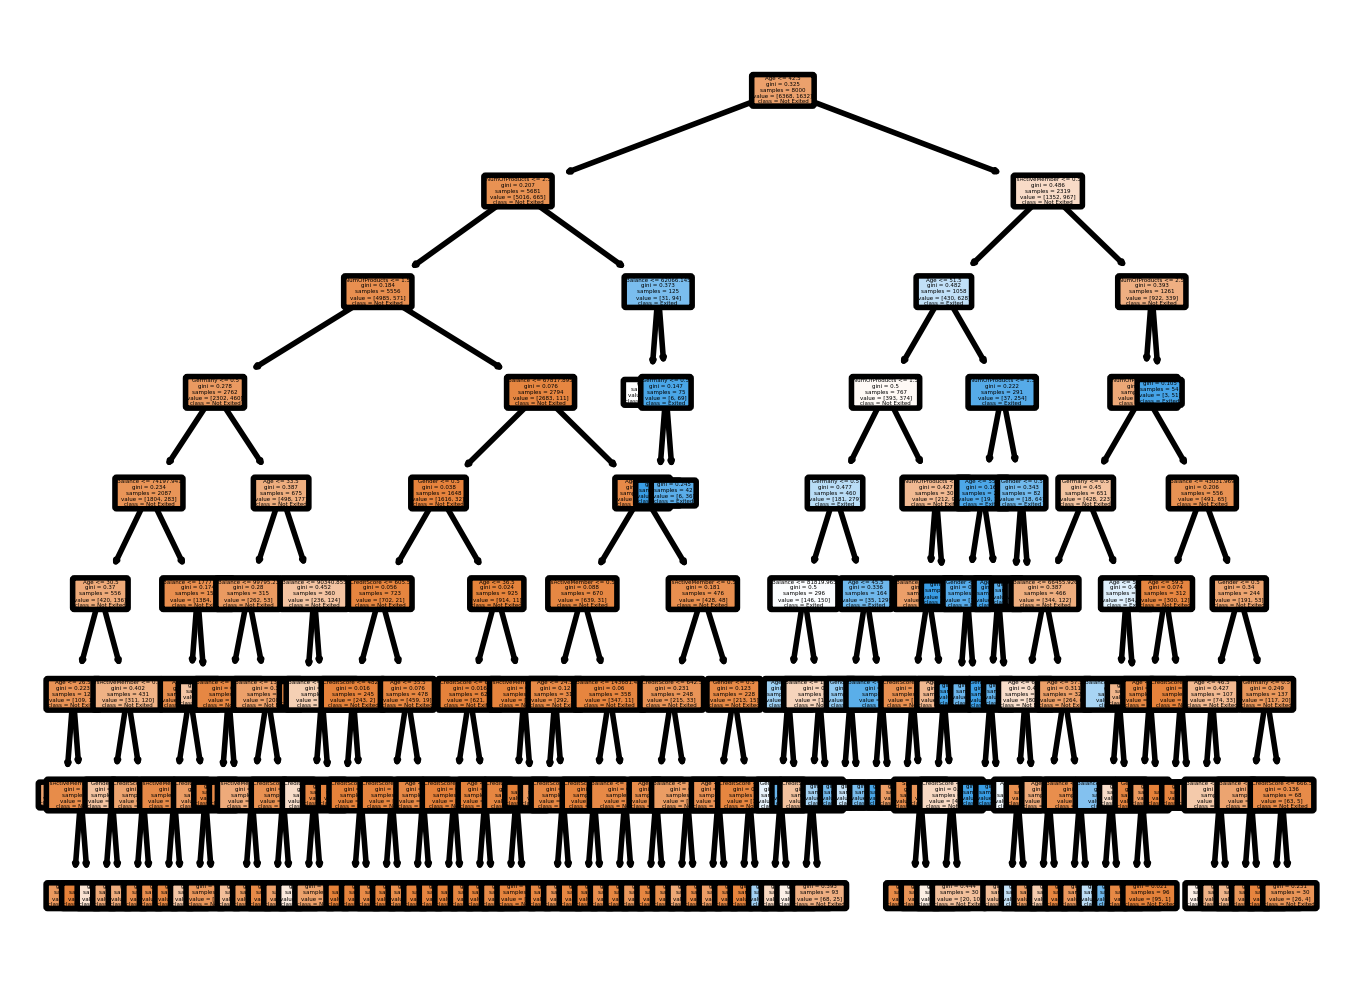

In [51]:
fnames = ['Germany','Spain','Gender','CreditScore','Age', 'Balance', 'NumOfProducts',
       'IsActiveMember']
cnames = ['Not Exited','Exited']

plt.figure(figsize=(4,3),dpi=400)
tree.plot_tree(model,filled=True,rounded=True,feature_names=fnames,
              class_names=cnames)
plt.savefig("dtree.png")
plt.show()


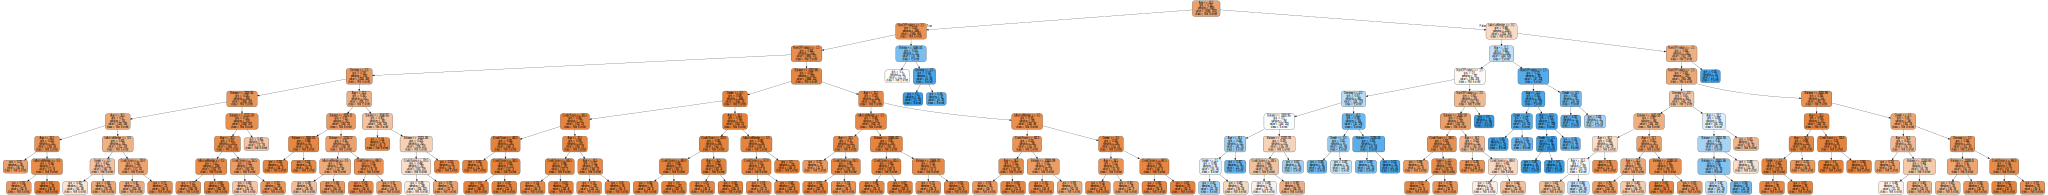

In [52]:
import graphviz
graph = tree.export_graphviz(model,feature_names=fnames, class_names=cnames, rounded=True,filled=True)
graph = graphviz.Source(graph)
graph


## Performace Analysis - Overfitting and Underfitting

In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=5)
model.fit(xtr,ytr)

DecisionTreeClassifier(random_state=5)

In [54]:
# performance of the algorithm on the test data
print(metrics.recall_score(yts,model.predict(xts)))
print(metrics.precision_score(yts,model.predict(xts)))
print(metrics.f1_score(yts,model.predict(xts)))


0.5111111111111111
0.4726027397260274
0.49110320284697506


In [55]:
# performance of the algorithm on the train data
print(metrics.recall_score(ytr,model.predict(xtr)))
print(metrics.precision_score(ytr,model.predict(xtr)))
print(metrics.f1_score(ytr,model.predict(xtr)))


0.9987745098039216
1.0
0.9993868792152054


#### Overfitting
    - model performs very well on the train data where as it fails to perform that well on the test data
    - this happens 
        - when the volume of data is very low (number of observations are very low)
        - when there is noise present in the data
        - the learning algorithm is so complex that it overlearns the patterns
        - there are noisy features present in the dataset
        

    - How to control overfitting
         - in case of decision tree, control the vlaues of parameters - 
             - decrease max parameters, increase min parameters
         - by increasing the number of observation - size of training set => number of rows in the dataset
         - by removing less impacting features / moisy features
         - by trying with less complex model


In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=5,max_depth=8,min_samples_leaf=25,min_samples_split=40)
model.fit(xtr,ytr)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=25, min_samples_split=40,
                       random_state=5)

In [54]:
# performance of the algorithm on the test data
print(metrics.recall_score(yts,model.predict(xts)))
print(metrics.precision_score(yts,model.predict(xts)))
print(metrics.f1_score(yts,model.predict(xts)))

0.43950617283950616
0.726530612244898
0.5476923076923077


In [55]:
# performance of the algorithm on the train data
print(metrics.recall_score(ytr,model.predict(xtr)))
print(metrics.precision_score(ytr,model.predict(xtr)))
print(metrics.f1_score(ytr,model.predict(xtr)))

0.4810049019607843
0.8010204081632653
0.601071975497703


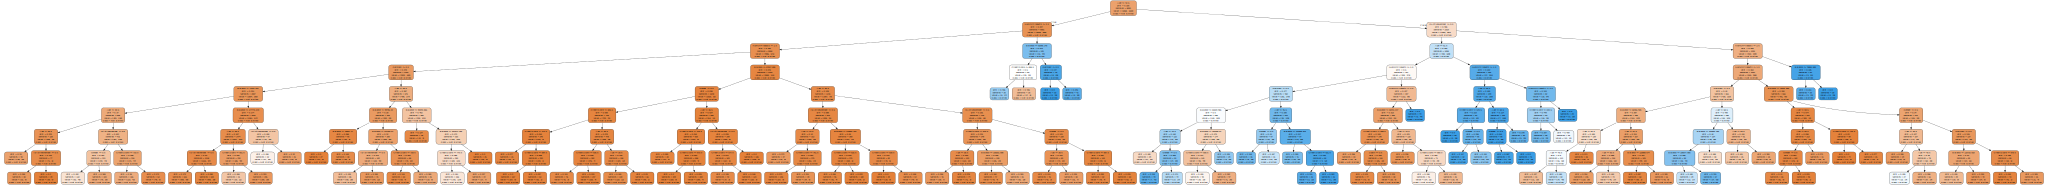

In [56]:
graph = tree.export_graphviz(model,feature_names=fnames, class_names=cnames, rounded=True,filled=True)
graph = graphviz.Source(graph)
graph

#### Underfitting
    - when the performance of the algorithm is lower on train data and also lower on test data
        - it happens - 
            - if the features are not informative enough to predict the label
            - if the learning algorithm is weaker, less powerful
            - if all the relevant features are not covered.
            
    - how to solve?
        - try a nonlinear/ more complex algorithm
        - increase the number of columns, features, bring more features
        


## Hyperparameter tuning using gridsearch


- a way of trying all combination of hyperparamteres from a given scope and identifying best values of hyperparameters

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
params = {"max_depth":np.arange(5,30,1),
         "min_samples_leaf":np.arange(5,60,5),
         "min_samples_split":np.arange(5,100,5)}
params

{'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29]),
 'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]),
 'min_samples_split': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
        90, 95])}

In [59]:
search = GridSearchCV(tree.DecisionTreeClassifier(random_state=5),param_grid=params,cv=5,
                     scoring='recall',n_jobs=-1,verbose=True)
search.fit(x2,y)

Fitting 5 folds for each of 5225 candidates, totalling 26125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 1644 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 3044 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 4844 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 7044 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 9644 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 12644 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 16044 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 19844 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 24044 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 26125 out of 26125 | elapsed:  6.5min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5), n_jobs=-1,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]),
                         'min_samples_split': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='recall', verbose=True)

In [60]:
search.best_score_

0.5110444669268198

In [61]:
search.best_params_

{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 30}

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=200,max_depth=15,min_samples_leaf=10)
model3.fit(xtr,ytr)

RandomForestClassifier(max_depth=15, min_samples_leaf=10, n_estimators=200)

In [67]:
# performance of the algorithm on the test data
print(metrics.recall_score(yts,model3.predict(xts)))
print(metrics.precision_score(yts,model3.predict(xts)))
print(metrics.f1_score(yts,model3.predict(xts)))

0.4271604938271605
0.7587719298245614
0.5466034755134281


In [68]:
# performance of the algorithm on the train data
print(metrics.recall_score(ytr,model3.predict(xtr)))
print(metrics.precision_score(ytr,model3.predict(xtr)))
print(metrics.f1_score(ytr,model3.predict(xtr)))

0.5110294117647058
0.8518896833503575
0.6388356951359633


## Ada Boost

In [70]:
from sklearn.ensemble import AdaBoostClassifier
model4 = AdaBoostClassifier(n_estimators=150,random_state=5)
model4.fit(xtr,ytr)

AdaBoostClassifier(n_estimators=150, random_state=5)

In [71]:
# performance of the algorithm on the test data
print(metrics.recall_score(yts,model4.predict(xts)))
print(metrics.precision_score(yts,model4.predict(xts)))
print(metrics.f1_score(yts,model4.predict(xts)))

0.4444444444444444
0.6870229007633588
0.5397301349325337


In [72]:
# performance of the algorithm on the train data
print(metrics.recall_score(ytr,model4.predict(xtr)))
print(metrics.precision_score(ytr,model4.predict(xtr)))
print(metrics.f1_score(ytr,model4.predict(xtr)))

0.4950980392156863
0.7453874538745388
0.5949926362297496


## Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(learning_rate=0.08,n_estimators=180,random_state=5)

model5.fit(xtr,ytr)

GradientBoostingClassifier(learning_rate=0.08, n_estimators=180, random_state=5)

In [74]:
# performance of the algorithm on the test data
print(metrics.recall_score(yts,model5.predict(xts)))
print(metrics.precision_score(yts,model5.predict(xts)))
print(metrics.f1_score(yts,model5.predict(xts)))

0.45925925925925926
0.7410358565737052
0.5670731707317073


In [75]:
# performance of the algorithm on the train data
print(metrics.recall_score(ytr,model5.predict(xtr)))
print(metrics.precision_score(ytr,model5.predict(xtr)))
print(metrics.f1_score(ytr,model5.predict(xtr)))

0.5147058823529411
0.8100289296046287
0.6294492319220681


## XGboost

In [79]:
# pip install xgboost

In [76]:
from xgboost import XGBClassifier
model6 = XGBClassifier(learning_rate=0.05,n_estimators=200)
model6.fit(xtr,ytr)

C:\Users\SPK\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:45:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
# performance of the algorithm on the test data
print(metrics.recall_score(yts,model6.predict(xts)))
print(metrics.precision_score(yts,model6.predict(xts)))
print(metrics.f1_score(yts,model6.predict(xts)))

0.4567901234567901
0.7341269841269841
0.563165905631659


In [78]:
# performance of the algorithm on the train data
print(metrics.recall_score(ytr,model6.predict(xtr)))
print(metrics.precision_score(ytr,model6.predict(xtr)))
print(metrics.f1_score(ytr,model6.predict(xtr)))

0.5649509803921569
0.8665413533834586
0.6839762611275964


## Stacking

In [84]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
m1 = LogisticRegression()
m2 = DecisionTreeClassifier(random_state=5,max_depth=15)
m3 = RandomForestClassifier(n_estimators=200,random_state=5)
m4 = GradientBoostingClassifier(n_estimators=200,random_state=5)

model7 = StackingClassifier(classifiers=[m1,m3,m4],meta_classifier=m2)
model7.fit(xtr,ytr)

StackingClassifier(classifiers=[LogisticRegression(),
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=5),
                                GradientBoostingClassifier(n_estimators=200,
                                                           random_state=5)],
                   meta_classifier=DecisionTreeClassifier(max_depth=15,
                                                          random_state=5))

In [85]:
# performance of the algorithm on the test data
print(metrics.recall_score(yts,model7.predict(xts)))
print(metrics.precision_score(yts,model7.predict(xts)))
print(metrics.f1_score(yts,model7.predict(xts)))

0.47160493827160493
0.6725352112676056
0.5544267053701016


In [86]:
# performance of the algorithm on the train data
print(metrics.recall_score(ytr,model7.predict(xtr)))
print(metrics.precision_score(ytr,model7.predict(xtr)))
print(metrics.f1_score(ytr,model7.predict(xtr)))

0.9987745098039216
1.0
0.9993868792152054
